# Project Inspiration
Choosing courses is hard; especially if you're a data-driven person like me.  I pour over course evaluations, cross-reference them with the required courses for the specializations I want, check if I should wait until the next semester to take a certain course, and so on.  It's an advanced puzzle and having a sub-par professor isn't any fun so the stakes are high.

NYU allows students to look through all the evaluation data, but it's limited to a clunky search bar and rows of results.  I can't average a professor's ratings or check when a course is usually offered without downloading data to perform my own analysis.  Additionally, when choosing courses it takes a lot of time to browse through available classes and check that class's course evaluations.  This project's goal is to simplify that process.  Specifically:

1. Summarize the historical evaluation data to answer the following questions:
    * Who are the best professors?
    * What are the best courses?
    * Which course/professor combinations are the best?
    * Which department recieves the best and worst ratings?
    * Which department/course/professor is the most demanding of a student's time?

2.  Summarize course evaluation data for current course offerings so students can view a single table of previous course evaluation results to make decisions.

3.  Apply machine learning to current course offerings to predict overall course ratings and how demanding those courses are.

# Data Source
Course faculty evaluation data was downloaded directly from the school's course evaluation web page.  There was a limit in the number of rows in each download, so multiple excel files were generated so fetch data beginning in the summer of 2013 through the winter of 2018.

### Data Time Range
* The data ranges from Summer 2011 through Spring 2018.
* Beginning Summer 2011, courses were renamed which would complicate the data wrangling below.  I do not believe eliminating data before Summer 2011 will present a problem with my analysis.  The most recent data from course evaluations will be the most relevant to predict future course evaluations.


### Data Survey Questions
After completing a course, students are asked a series of questions to rate the course.  Each question (except question 6) asks students to choose a rank between 1 and 7 where 1 is a poor rating and 7 is the best rating.  Question 6 asks students to rank a course for how demanding of his/her time it was.  This ranking is from -3 (not demanding enough) to +3 (too demanding).  The list of questions in this data set is below.
* Q1 = The instructor was well prepared.
* Q2 = The instructor communicated well.
* Q3 = The instructor motivated me to learn.
* Q4 = Overall evaluation of the instructor.
* Q5 = This course was challenging and made me think.
* Q6 = This course was appropriately demanding of my time.
* Q7 = This course was relevant to my business education.
* Q8 = Overall evaluation of the course.
* Q9* = This course provided learning opportunities to increase awareness of how I communicate in teams and practice peer feedback.

*Only for certain NOCR Courses

In [2]:
#Loading the packages I need
%reset
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Data Cleaning

In [3]:
#checking working directory
import os
dirpath = os.getcwd()
os.getcwd()
os.chdir('C:\\Users\\dancb\\OneDrive\\Documents\\Stern ClassX\\data')

#loading one of the xlsx files with pandas
df = pd.read_excel("raw data/2013_data_FallSummer.xlsx", sheet_name="means")

#Taking a first look at the data
display(df.head(10))

,Q1 = The instructor was well prepared.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,Q2 = The instructor communicated well.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q3 = The instructor motivated me to learn.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q4 = Overall evaluation of the instructor.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q5 = This course was challenging and made me t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q6 = This course was appropriately demanding o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Q7 = This course was relevant to my business e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Q8 = Overall evaluation of the course.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,TM,CRS_N,CRS_SEC,TITLE,UID,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,...,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,NaN,NaN
9,2013F,ACCT-GB.2303,001,FINANCIAL STATEMENT ANAL,XXXXXXXXX,"YEO, JULIAN",30,28,26,3.9,...,5.2,5.3,0.3,0.3,5.6,5.7,5.4,5.5,NaN,NaN


In [4]:
len(df)

476

### Removing non-data rows

The data frame has 476 rows, but there are several rows of text that explain the survey questions (see rows 0 through 6) so I'll need to remove those.

I'll first set the data frame header row since it is currently set as one of the rows of explanation that we want to remove.  Row 8 is the actual header row for the data.

In [5]:
#Setting row 8 as the header row
df.columns = df.iloc[8] 
display(df.head(2))

8,TM,CRS_N,CRS_SEC,TITLE,UID,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,...,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,nan,nan
0,Q2 = The instructor communicated well.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q3 = The instructor motivated me to learn.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The column names are now what they should be.

Looking at column "TM" (which is the term of the course) the rows I want to keep have a year followed by a letter which signifies the semester and year (2013F means Fall semester of 2013).  

In this same column there are rows that contain the text I need to remove.  Since each of the rows I don't need start with a "Q" and the rows I want to keep do not, I will delete all the rows that have a "Q" in them.  There are also duplicate header rows that contain "TM" that I need to remove.  Additionally, the rows that have NaN in the first column can be deleted as well since those are just blank rows.

In [6]:
#In the df data frame, only keep rows that do not contain (~) a "Q" or "TM" in the rows of the column "TM".
df = df[~df['TM'].str.contains("Q|TM", na=False)] 

#Next, only keep rows have nonnull values in the column "TM"
df = df[pd.notnull(df['TM'])] 

print(len(df))
display(df.head(3))

454


8,TM,CRS_N,CRS_SEC,TITLE,UID,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,...,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,nan,nan
9,2013F,ACCT-GB.2303,001,FINANCIAL STATEMENT ANAL,XXXXXXXXX,"YEO, JULIAN",30,28,26,3.9,...,5.2,5.3,0.3,0.3,5.6,5.7,5.4,5.5,NaN,NaN
10,2013F,ACCT-GB.2303,010,FINANCIAL STATEMENT ANAL,XXXXXXXXX,"FRIED, HAIM-DOV",38,33,31,3.3,...,5.7,5.8,0.5,0.5,5.9,6,5.5,5.6,NaN,NaN
11,2013F,ACCT-GB.2303,091,FINANCIAL STATEMENT ANAL,XXXXXXXXX,"FRIED, HAIM-DOV",5,5,5,3.4,...,6.8,6.8,0,0,6.8,6.8,6.8,6.8,NaN,NaN


Now the data frame has 454 rows which means 22 (476 - 454) rows were removed.  The non-data rows have been removed.

### Dropping NaN columns
-----

I see there are a couple of columns at the right end of the data frame that contain NaNs so I want to check this column to see if it contains all NaNs.

In [7]:
#Check each column for all null values
df.isnull().all()

8
TM           False
CRS_N        False
CRS_SEC      False
TITLE        False
UID          False
INSTR        False
N_ST         False
R_ST         False
TRIM_ST      False
AVG_X_GR     False
AVG_A        False
AVG_B        False
AVG_C        False
AVG_D        False
AVG_F        False
AVG_Q1       False
AVG_Q1_TR    False
AVG_Q2       False
AVG_Q2_TR    False
AVG_Q3       False
AVG_Q3_TR    False
AVG_Q4       False
AVG_Q4_TR    False
AVG_Q5       False
AVG_Q5_TR    False
AVG_Q6       False
AVG_Q6_TR    False
AVG_Q7       False
AVG_Q7_TR    False
AVG_Q8       False
AVG_Q8_TR    False
NaN          False
NaN          False
dtype: bool

### Where are the nonnull rows?

I'll use iloc to find any rows where column 32 does not have a NaN value. Since the column header is NaN, I will just use the column index.

In [8]:
display(df.loc[df.iloc[:,32].notnull()])

8,TM,CRS_N,CRS_SEC,TITLE,UID,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,...,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,nan,nan
464,2013F,NOCR-GB.2045,0A1,TEAM COMMUNICATION,XXXXXXXXX,"LENNARD, DIANE",33,27,25,4,...,5.4,5.5,0.4,0.3,6.1,6.2,6,6.1,6.6,6.7
465,2013F,NOCR-GB.2045,0A2,TEAM COMMUNICATION,XXXXXXXXX,"STEHLIK, SUSAN",33,27,25,3.9,...,5.1,5.2,0.5,0.5,5.9,6,5.7,5.8,6,6.1
466,2013F,NOCR-GB.2045,0A3,TEAM COMMUNICATION,XXXXXXXXX,"SCHENKLER, IRVING",32,26,24,4,...,5.4,5.4,0.3,0.2,5.9,6,6,6,6.4,6.5
467,2013F,NOCR-GB.2045,0A4,TEAM COMMUNICATION,XXXXXXXXX,"PURDY, DAVID A",33,28,26,3.8,...,5.6,5.6,0.1,0.1,5.7,5.8,6,6,6.2,6.3
468,2013F,NOCR-GB.2045,0A5,TEAM COMMUNICATION,XXXXXXXXX,"YOUNGER, JEFFREY J.",32,29,27,3.8,...,5.4,5.4,0.4,0.3,5.9,6,5.8,5.9,6.3,6.4
469,2013F,NOCR-GB.2045,0A6,TEAM COMMUNICATION,XXXXXXXXX,"WOLFF, ALINE",32,29,27,3.9,...,4.7,4.7,0.2,0.2,5.2,5.2,5.1,5.1,5.7,5.7
470,2013F,NOCR-GB.2045,0B1,TEAM COMMUNICATION,XXXXXXXXX,"LENNARD, DIANE",33,23,21,3.9,...,5.5,5.6,0.3,0.2,6,6,6.1,6.1,6.6,6.6
471,2013F,NOCR-GB.2045,0B2,TEAM COMMUNICATION,XXXXXXXXX,"STEHLIK, SUSAN",34,32,30,3.9,...,5.1,5.1,0.1,0.1,5.5,5.5,5.5,5.5,6.2,6.2
472,2013F,NOCR-GB.2045,0B3,TEAM COMMUNICATION,XXXXXXXXX,"SCHENKLER, IRVING",32,25,23,3.8,...,5.3,5.3,0.4,0.3,5.4,5.4,5.6,5.7,6.1,6.1
473,2013F,NOCR-GB.2045,0B4,TEAM COMMUNICATION,XXXXXXXXX,"PURDY, DAVID A",33,31,29,3.9,...,5.4,5.4,0.2,0.2,5.7,5.8,6,6,6.4,6.5


Ah, these rows are for survey Question 9.
* Q9* = This course provided learning opportunities to increase awareness of how I communicate in teams and practice peer feedback.

All of the rows with values in columns 31 and 32 (the 2 right most columns) are NOCR courses in TEAM COMMUNICATION.  NOCR means this is a non-credit course.  

Even though this is a NOCR course, I want to keep it in my data frame in case students are considering this course.

I'll now rename the columns appropriately (matching the format of the other column headers).

In [9]:
#df[:,32].notnull()
display(df.loc[df.iloc[:,32].notnull()])

8,TM,CRS_N,CRS_SEC,TITLE,UID,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,...,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,nan,nan
464,2013F,NOCR-GB.2045,0A1,TEAM COMMUNICATION,XXXXXXXXX,"LENNARD, DIANE",33,27,25,4,...,5.4,5.5,0.4,0.3,6.1,6.2,6,6.1,6.6,6.7
465,2013F,NOCR-GB.2045,0A2,TEAM COMMUNICATION,XXXXXXXXX,"STEHLIK, SUSAN",33,27,25,3.9,...,5.1,5.2,0.5,0.5,5.9,6,5.7,5.8,6,6.1
466,2013F,NOCR-GB.2045,0A3,TEAM COMMUNICATION,XXXXXXXXX,"SCHENKLER, IRVING",32,26,24,4,...,5.4,5.4,0.3,0.2,5.9,6,6,6,6.4,6.5
467,2013F,NOCR-GB.2045,0A4,TEAM COMMUNICATION,XXXXXXXXX,"PURDY, DAVID A",33,28,26,3.8,...,5.6,5.6,0.1,0.1,5.7,5.8,6,6,6.2,6.3
468,2013F,NOCR-GB.2045,0A5,TEAM COMMUNICATION,XXXXXXXXX,"YOUNGER, JEFFREY J.",32,29,27,3.8,...,5.4,5.4,0.4,0.3,5.9,6,5.8,5.9,6.3,6.4
469,2013F,NOCR-GB.2045,0A6,TEAM COMMUNICATION,XXXXXXXXX,"WOLFF, ALINE",32,29,27,3.9,...,4.7,4.7,0.2,0.2,5.2,5.2,5.1,5.1,5.7,5.7
470,2013F,NOCR-GB.2045,0B1,TEAM COMMUNICATION,XXXXXXXXX,"LENNARD, DIANE",33,23,21,3.9,...,5.5,5.6,0.3,0.2,6,6,6.1,6.1,6.6,6.6
471,2013F,NOCR-GB.2045,0B2,TEAM COMMUNICATION,XXXXXXXXX,"STEHLIK, SUSAN",34,32,30,3.9,...,5.1,5.1,0.1,0.1,5.5,5.5,5.5,5.5,6.2,6.2
472,2013F,NOCR-GB.2045,0B3,TEAM COMMUNICATION,XXXXXXXXX,"SCHENKLER, IRVING",32,25,23,3.8,...,5.3,5.3,0.4,0.3,5.4,5.4,5.6,5.7,6.1,6.1
473,2013F,NOCR-GB.2045,0B4,TEAM COMMUNICATION,XXXXXXXXX,"PURDY, DAVID A",33,31,29,3.9,...,5.4,5.4,0.2,0.2,5.7,5.8,6,6,6.4,6.5


All of the rows with values in columns 31 and 32 (the 2 right most columns) are NOCR courses in TEAM COMMUNICATION.  NOCR means this is a non-credit course.  I had to review the original data set to discover that for these courses there is an extra survey question (Q9):

"Q9 = This course provided learning opportunities to increase awareness of how I communicate in teams and practice peer feedback."

Even though this is a NOCR course, I want to keep it in my data frame in case students are considering this course.  There's no need to throw out the data, so I'll keep the data frame how it is.

Now I'll rename the last 2 columns.

In [10]:
df.columns.values[31] = "AVG_Q9"
df.columns.values[32] = "AVG_Q9_TM"
display(df.head(2))

8,TM,CRS_N,CRS_SEC,TITLE,UID,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,...,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,AVG_Q9,AVG_Q9_TM
9,2013F,ACCT-GB.2303,001,FINANCIAL STATEMENT ANAL,XXXXXXXXX,"YEO, JULIAN",30,28,26,3.9,...,5.2,5.3,0.3,0.3,5.6,5.7,5.4,5.5,NaN,NaN
10,2013F,ACCT-GB.2303,010,FINANCIAL STATEMENT ANAL,XXXXXXXXX,"FRIED, HAIM-DOV",38,33,31,3.3,...,5.7,5.8,0.5,0.5,5.9,6,5.5,5.6,NaN,NaN


### Importing and combining all of the data

Since I have >12 files to import and combine, I'll use a loop to import and combine them all.

In [11]:
path = os.getcwd()
path = "C:/Users/dancb/OneDrive/Documents/Stern ClassX/data/raw data"
os.chdir(path)
files = os.listdir(path)
#This will only select the file names that contain xlsx in the last 4 letters of the file name
#The folder currently only has xlsx files, but I would like this step to make sure the code is robust in the future
files_xlsx = [f for f in files if f[-4:] == 'xlsx'] 
files_xlsx

['2013_data_FallSummer.xlsx',
 '2013_data_SpringWinter.xlsx',
 '2014_data_FallSummer.xlsx',
 '2014_data_SpringWinter.xlsx',
 '2015_data_FallSummer.xlsx',
 '2015_data_SpringWinter.xlsx',
 '2016_data_FallSummer.xlsx',
 '2016_data_SpringWinter.xlsx',
 '2017_data_FallSummer.xlsx',
 '2017_data_SpringWinter.xlsx',
 '2018_data_Spring.xlsx',
 'means_20190101155740_db3798.xlsx',
 'means_20190101155819_db3798.xlsx',
 'means_20190101155849_db3798.xlsx']

In [12]:
data = None
df_files = None
#Using the set of column names defined in the df above
column_names = df.columns

#first make an empty data frame
df_files = pd.DataFrame()

for f in files_xlsx:
    print("File in progress is " + f)
    #read each file in files_xlsx and sheet named means
    data = pd.read_excel(f, 'means') #import the excel file, sheet 'means'
    
    if len(data.columns) > 31: #if there are columns 32 and 33, name them as below
        data.columns.values[31] = "AVG_Q9"
        data.columns.values[32] = "AVG_Q9_TM"
    else:
        data["AVG_Q9"] = np.nan
        data["AVG_Q9_TM"] = np.nan
    
    data.columns = column_names #Assign column names
    
    #print("Rows in data data frame " + str(len(data)))
    #print("Cols in data data frame " + str(len(data.columns)))

    df_files = df_files.append(data) #append the data frame to df_files
    #print("Rows in df_files data frame " + str(len(df_files)))
    #print("Cols in df_files data frame " + str(len(df_files.columns)))

print("Rows in data frame: " + str(len(df_files)))

File in progress is 2013_data_FallSummer.xlsx
File in progress is 2013_data_SpringWinter.xlsx
File in progress is 2014_data_FallSummer.xlsx
File in progress is 2014_data_SpringWinter.xlsx
File in progress is 2015_data_FallSummer.xlsx
File in progress is 2015_data_SpringWinter.xlsx
File in progress is 2016_data_FallSummer.xlsx
File in progress is 2016_data_SpringWinter.xlsx
File in progress is 2017_data_FallSummer.xlsx
File in progress is 2017_data_SpringWinter.xlsx
File in progress is 2018_data_Spring.xlsx
File in progress is means_20190101155740_db3798.xlsx
File in progress is means_20190101155819_db3798.xlsx
File in progress is means_20190101155849_db3798.xlsx
Rows in data frame: 5660


Now I'm going to run the same cleaning steps I did when I was exploring just one of the files above.  I am also going to remove any courses that are PhD-level courses.  PhD courses have course numbers in the 4000 level and above.  I will also drop the UID column since there is no useful data there.

In [13]:
df = df_files.copy() #make a copy of the df_files data frame
print("Unaltered data files rows: ", len(df))
df = df[~df['TM'].str.contains("Q|TM", na=False)] 
df = df[pd.notnull(df['TM'])] 
print("Rows after removing non-data rows: ", len(df))

#I'm only interested in evaluating MBA-level courses so I'm going to drop any courses that are 4000 level and above from the data
df['CRS_NUM'] = df['CRS_N'].astype(str).str[-4:]
df['CRS_NUM'] = pd.to_numeric(df['CRS_NUM'], errors="coerce")
df = df[df.CRS_NUM < 3999]
df = df[~df['TITLE'].str.contains("FINANCIAL THEORY", na=False)]
print("Rows after removing PhD course evaluations: ", len(df))

#UID doesn't appear to have any useful data, so I'm going to drop it
df = df.drop(['UID'], axis=1)
display(df.head(3))

Unaltered data files rows:  5660
Rows after removing non-data rows:  5435
Rows after removing PhD course evaluations:  5005


8,TM,CRS_N,CRS_SEC,TITLE,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,AVG_A,...,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,AVG_Q9,AVG_Q9_TM,CRS_NUM
9,2013F,ACCT-GB.2303,001,FINANCIAL STATEMENT ANAL,"YEO, JULIAN",30,28,26,3.9,85.71,...,5.3,0.3,0.3,5.6,5.7,5.4,5.5,NaN,NaN,2303
10,2013F,ACCT-GB.2303,010,FINANCIAL STATEMENT ANAL,"FRIED, HAIM-DOV",38,33,31,3.3,45.45,...,5.8,0.5,0.5,5.9,6,5.5,5.6,NaN,NaN,2303
11,2013F,ACCT-GB.2303,091,FINANCIAL STATEMENT ANAL,"FRIED, HAIM-DOV",5,5,5,3.4,40,...,6.8,0,0,6.8,6.8,6.8,6.8,NaN,NaN,2303


We removed 600 rows from the data frame.

# Exploratory Data Analysis

### Resonse rate over time

I'm interested in the response rate of the course survey over time to check for any major swings in response rates that could lead me to question the survey results.  For example, if there was suddenly a strong incentive for students to complete the course evaluation half way through the data set, then I'd consider throwing out part of the data.

I'll make a new column called "RESPONSE RATE" which will be R_ST / N_ST.

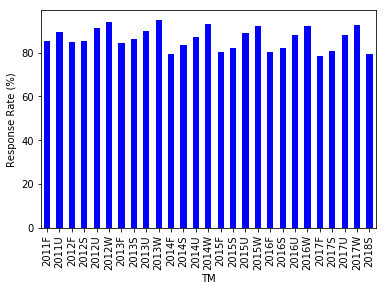

In [14]:
#df_test = df.copy() #make a copy of the data frame

for c in df.columns[6:33]:
        df[c] = pd.to_numeric(df[c], errors='coerce') #converting columns to numeric so I can perform calculations

#only keep rows where the number responses is > 0
df = df[df.R_ST > 0]

#divide number of responses by number of enrolled students to get the response rate of the survey
df['RESPONSERATE'] = df['R_ST'].div(df['N_ST'])
df['RESPONSERATE'] = pd.to_numeric(df['RESPONSERATE'], errors='coerce')

group_by_responserate = df.groupby(by=['TM'])
responserate_avg = group_by_responserate.mean()
responserate_count = group_by_responserate.count()
responserate_avg.RESPONSERATE = responserate_avg.RESPONSERATE * 100
responserate_avg.RESPONSERATE.plot.bar(color='blue')
plt.ylabel('Response Rate (%)')
plt.show()

There is a pattern in the data that shows consistently high response rates for Summer and Winter terms with the Winter terms always having the highest response rate.  However, the response rates are consistent across the data set, so I do not see a need to remove any data.

### Average Course Evaluation



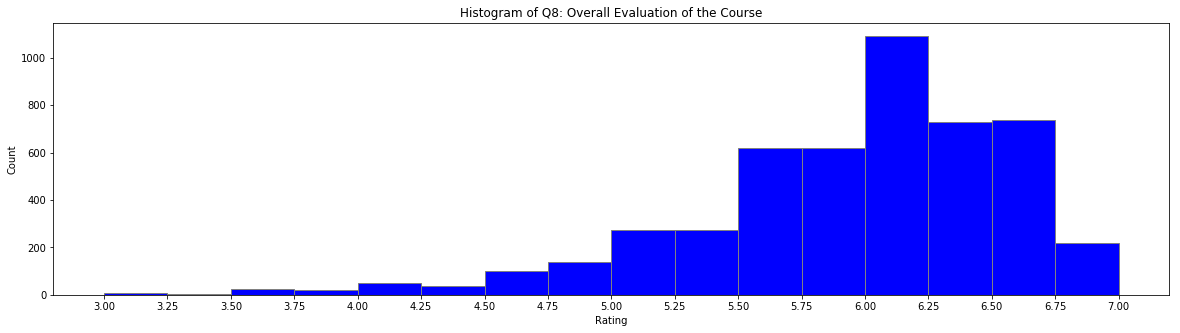

Average:  5.92
Standard deviation:  0.65
Median:  6.0


In [15]:
data = df.AVG_Q8_TR.dropna() #remove any NaNs
fig, ax = plt.subplots(figsize=(20, 5))
num_bins=16
counts, bins, patches = ax.hist(data, num_bins, facecolor='blue', edgecolor='gray', range=[3, 7]) #set the range from 3-7

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title(r'Histogram of Q8: Overall Evaluation of the Course')
plt.show()

mu = data.mean()
sigma = data.std()
median = data.median()
print("Average: ", "%.2f" % mu)
print("Standard deviation: ", "%.2f" % sigma)
print("Median: ", median)

### Most courses are rated pretty well
The most common average rating for a course is between 6 and 6.25 with the average at 5.9.

### Average result for Q6: how demanding the course was

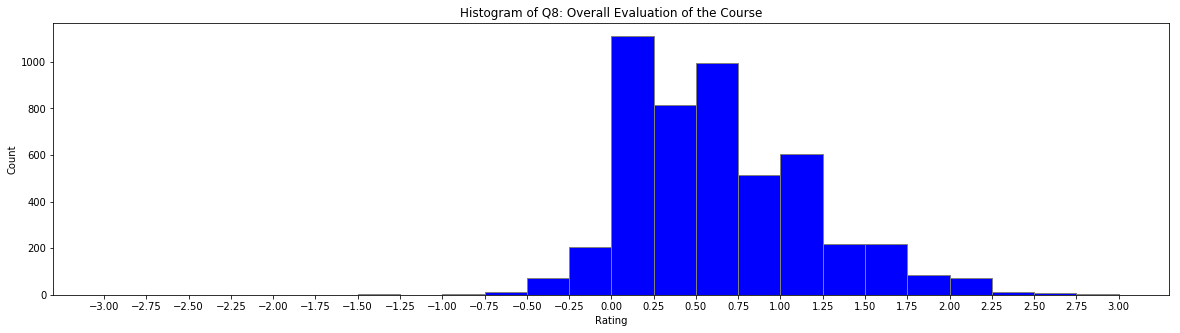

Average:  0.61
Standard deviation:  0.54
Median:  0.5


In [16]:
data = df.AVG_Q6_TR.dropna() #remove any NaNs
fig, ax = plt.subplots(figsize=(20, 5))
num_bins=24
counts, bins, patches = ax.hist(data, num_bins, facecolor='blue', edgecolor='gray', range=[-3, 3]) #set the range from 3-7

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title(r'Histogram of Q8: Overall Evaluation of the Course')
plt.show()

mu = data.mean()
sigma = data.std()
median = data.median()
print("Average: ", "%.2f" % mu)
print("Standard deviation: ", "%.2f" % sigma)
print("Median: ", median)

## Most courses are somewhat demanding of student's time
No surprise here.  Courses will require time from students.  Something to consider is how each student interprets the survey question.  Since the question states "This course was appropriately demanding of my time" it is up to the student to decide what "demanding" is.  I assume a selection of 0 would mean "just right" and a selection of 1 would mean "slightly too demanding" and so on, but this will vary from student to student.

# Average Professor Rating

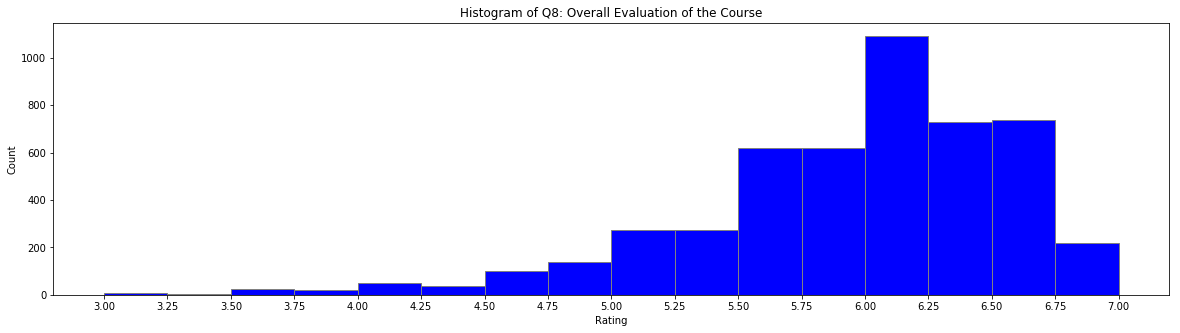

Average:  5.92
Standard deviation:  0.65
Median:  6.0


In [17]:
data = df.AVG_Q8_TR.dropna() #remove any NaNs
fig, ax = plt.subplots(figsize=(20, 5))
num_bins=16
counts, bins, patches = ax.hist(data, num_bins, facecolor='blue', edgecolor='gray', range=[3, 7]) #set the range from 3-7

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title(r'Histogram of Q8: Overall Evaluation of the Course')
plt.show()

mu = data.mean()
sigma = data.std()
median = data.median()
print("Average: ", "%.2f" % mu)
print("Standard deviation: ", "%.2f" % sigma)
print("Median: ", median)

## Most professors are rated well
This histogram looks almost identical to the histogram for question 8 above so I suspect Q8 and Q4 are closely correlated.  This would make sense since a course that you enjoyed was taught by a professor you also enjoyed. 

### Adding columns for section and department

I want to explore any relationships between rating and section or department.

In [18]:
#add new DEPT column with first four letters of course number
df['DEPT'] = df['CRS_N'].astype(str).str[0:4]
df.DEPT.unique()

array(['ACCT', 'BSPA', 'COR1', 'COR2', 'DBIN', 'ECON', 'FINC', 'INFO',
       'INTA', 'MCOM', 'MGMT', 'MKTG', 'NOCR', 'OPMG', 'STAT'],
      dtype=object)

In [19]:
#Adding column for section using last 2 characters of the department (drops the leading zero)
df['SEC'] = df.CRS_SEC.str[-2]

#replacing U with 10, W with 11, and S with 12 so that they are numbers
df.SEC = df.SEC.replace({'U': 10,'W' : 11, 'S' : 12})

From some exploratory analysis I know the following about the course sections (ignoring the leading 0):

* Sections beginning with 3 are in the evening
* Sections beginning with 2 are during the day
* Sections beginning with S are on the weekend
* Sections beginning with W are during the winter intensive period
* Sections beginning with D are for the "Doing Business In" courses
* Sections beginning with U1 are in the summer
* Sections beginning with 4, 6, 7 are in the summer

There are some sections that fall outside of these patterns; perhaps I'll have enough data from what I know to do some analysis.

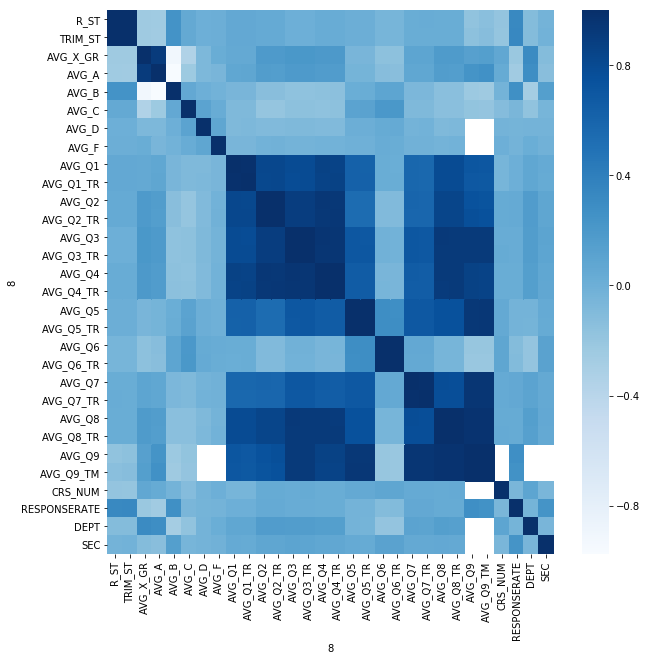

In [20]:
import seaborn as sns

df_corr = df.copy()

#convert the sections to numbers so I can use them in calculations
df_corr.SEC = pd.to_numeric(df_corr.SEC, errors = 'coerce')

#Changing department to categorical values
df_corr['DEPT'] = df_corr.DEPT.astype('category')

#Change the DEPT column to category codes
df_corr.DEPT = df_corr['DEPT'].cat.codes

#First make a new df by dropping NaNs from course section column
df_corr = df_corr[pd.notnull(df['SEC'])]
#convert DEPT column to numeric
df_corr.DEPT = pd.to_numeric(df_corr.DEPT)
#convert section column to numeric
df_corr.SEC = pd.to_numeric(df_corr.SEC)

#calculate the correlation matrix
corr = df_corr.corr()

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap="Blues")

## Reviewing the Correlation Matrix

From the matrix, the following correlations are observed:

* The survey questions are all correlated with each other which is not unexpected.  If you didn't enjoy a course, you'd probably rate it poorly across all questions and vice versa.
* Q4 and Q8 (as I expected from the histograms).
* DEPT and Q6 (how demanding the course was).
* DEPT and Average Expected Grade
* SEC doesn't correlate with anything except RESPONSERATE (we observe this when reviewing the response rate for each term)
* The average grade expected by students and Q6.  Not surprising since a demanding course may lead students to believe they will receive a lower grade.
* Course Number and average expected grade.  Perhaps not surprising since higher course numbers imply more advanced courses.

RESPONSERATE correlates weakly with several other variables:
* Average expected grade
* Number of Bs expected
* Negative correlation with number of As

# Most Demanding Departments

Since there was a correlation between DEPT and Q6, I want to see what the most (and least) demanding departments are.  Recall previously that the average result for Q6 was 0.61.

In [21]:
demanding = df.copy()
demanding = demanding.rename(columns={'AVG_Q8_TR': 'Overall Course Evaluation (1 to 7)', 
                                      'AVG_Q6_TR': 'How Demanding the Course Was (-3 to +3)',
                                     'AVG_Q4_TR': 'Overall Professor Evaluation (1 to 7)'})
demanding = demanding.groupby(['DEPT']).mean().round(2)
print("Average for data set: ", df['AVG_Q6_TR'].mean())
display(demanding[['Overall Course Evaluation (1 to 7)','How Demanding the Course Was (-3 to +3)','Overall Professor Evaluation (1 to 7)']].sort_values([('How Demanding the Course Was (-3 to +3)')],ascending=False))

Average for data set:  0.6102403554837389


8,Overall Course Evaluation (1 to 7),How Demanding the Course Was (-3 to +3),Overall Professor Evaluation (1 to 7)
DEPT,,,
STAT,5.81,1.15,5.94
INFO,5.82,0.90,5.89
ACCT,5.76,0.89,5.84
COR2,5.49,0.89,5.98
COR1,5.80,0.70,5.93
INTA,5.81,0.69,5.92
FINC,6.05,0.63,6.12
BSPA,6.10,0.61,6.21
MCOM,6.13,0.61,6.29


# Top Rated Courses by Department

In [22]:
print("Average for data set: ", df['AVG_Q8_TR'].mean())
display(demanding[['Overall Course Evaluation (1 to 7)','How Demanding the Course Was (-3 to +3)','Overall Professor Evaluation (1 to 7)']].sort_values([('Overall Course Evaluation (1 to 7)')],ascending=False))

Average for data set:  5.922965057564138


8,Overall Course Evaluation (1 to 7),How Demanding the Course Was (-3 to +3),Overall Professor Evaluation (1 to 7)
DEPT,,,
OPMG,6.19,0.55,6.24
MGMT,6.15,0.36,6.26
MCOM,6.13,0.61,6.29
BSPA,6.10,0.61,6.21
FINC,6.05,0.63,6.12
DBIN,6.01,0.22,5.92
MKTG,5.88,0.47,6.04
ECON,5.84,0.57,6.04
INFO,5.82,0.90,5.89


# Top Rated Professors

In [23]:
prof = df.copy()
prof = prof.groupby('INSTR').filter(lambda x: x['N_ST'].nunique() >= 10)
print("Rows removed: ", len(df) - len(prof))

#group_by_prof = group_by_prof.filter(lambda x: x['N_ST'] > 5)
#group_by_prof.set_index('INSTR').AVG_Q8_TR.plot.bar(color='blue')
#plt.ylabel('Overall course evaluation (1-7)')
#plt.show()
#grouped.filter(lambda x: x['B'].mean() > 3.)
#prof = prof.agg(['mean', 'std', 'count'])
prof = prof.groupby(['INSTR'])
prof = prof.agg(['mean', 'std', 'count']).round(2)
#prof.AVG_Q8_TR.sort_values('mean', ascending=False)
prof[['AVG_Q8_TR','AVG_Q4_TR']].sort_values([('AVG_Q4_TR','mean')],ascending=False).head(20)

Rows removed:  1695


AVG_Q8_TR             AVG_Q4_TR            
                           mean   std count      mean   std count
INSTR                                                            
SCHWED, GUSTAVO            6.72  0.15    17      6.79  0.13    17
HOLMES, ACHIM M.           6.69  0.10    14      6.78  0.11    14
DAMODARAN, ASWATH          6.62  0.13    16      6.76  0.09    16
LJUNGQVIST, ALEXANDER      6.61  0.28    15      6.75  0.21    15
SILBER, WILLIAM L.         6.63  0.19    19      6.73  0.18    19
MURPHY, CHARLES J.         6.61  0.16    20      6.67  0.14    20
BILLINGS, MARY             6.51  0.27    17      6.66  0.26    17
MUELLER, HOLGER            6.53  0.33    15      6.63  0.29    15
HENDLER, RICHARD M.        6.50  0.30    37      6.62  0.26    37
BURNS, RONNI               6.43  0.32    20      6.62  0.25    20
LOBEL, ILAN                6.61  0.29    11      6.59  0.30    11
STROEBEL, JOHANNES         6.37  0.24    14      6.59  0.23    14
CHUGH, DOLLY               6.13  0.56    19      6.59  0.24    19
LENNARD, DIANE             6.37  0.40    39      6.58  0.23    39
SCHMEITS, ANJOLEIN         6.47  0.19    42      6.56  0.18    42
GORMLEY, FRAN              6.48  0.32    12      6.55  0.27    12
BOWMAKER, SIMON            6.32  0.27    14      6.54  0.21    14
FOUDY, JOSEPH F.           6.24  0.41    26      6.54  0.30    26
YEO, JULIAN                6.39  0.36    33      6.52  0.32    33
LEVINA, NATALIA            6.29  0.34    15      6.51  0.38    15

# Top Rated Course

In [24]:
course = df.copy()
course = course.groupby('CRS_N').filter(lambda x: x['CRS_N'].count() >= 10)
print("Rows removed: ", len(df) - len(course))
course = course.groupby(['CRS_N','TITLE'])
course = course.mean().round(2)
course[['AVG_Q8_TR','AVG_Q4_TR']].sort_values([('AVG_Q8_TR')],ascending=False).head(30)

Rows removed:  1198


,8,AVG_Q8_TR,AVG_Q4_TR
CRS_N,TITLE,,
FINC-GB.3365,PRIVATE EQUITY FINANCE,6.71,6.79
FINC-GB.3199,CASE STDS-BANKRPCY&REORGS,6.69,6.78
OPMG-GB.2312,OPERATIONS IN PANAMA,6.63,6.47
INTA-GB.3105,"GLB MKTS,HUM RGHT&THE PRE",6.60,6.60
FINC-GB.2334,FINANCIAL SERVICES INDUST,6.60,6.70
MCOM-GB.2122,THE PERFORMING MANAGER,6.56,6.69
NOCR-GB.2046,COACHING FOR IMPACT,6.56,6.70
BSPA-GB.2120,ENTERTAINMENT LAW,6.53,6.69
BSPA-GB.2314,BUSINESS LAW,6.51,6.64


# Top rated professors

In [25]:
prof = df.copy()
#Only use data where a course occurs more than 10 times
prof = prof.groupby('INSTR').filter(lambda x: x['INSTR'].count() >= 10)
print("Rows removed: ", len(df) - len(prof))

#group_by_prof = group_by_prof.filter(lambda x: x['N_ST'] > 5)
#group_by_prof.set_index('INSTR').AVG_Q8_TR.plot.bar(color='blue')
#plt.ylabel('Overall course evaluation (1-7)')
#plt.show()
#grouped.filter(lambda x: x['B'].mean() > 3.)
#prof = prof.agg(['mean', 'std', 'count'])
prof = prof.groupby(['INSTR'])
prof = prof.mean().round(2)
#prof.AVG_Q8_TR.sort_values('mean', ascending=False)
prof[['AVG_Q8_TR','AVG_Q4_TR']].sort_values([('AVG_Q8_TR')],ascending=False).head(30)

Rows removed:  1443


8,AVG_Q8_TR,AVG_Q4_TR
INSTR,,
"SCHWED, GUSTAVO",6.72,6.79
"HOLMES, ACHIM M.",6.69,6.78
"SILBER, WILLIAM L.",6.63,6.73
"DAMODARAN, ASWATH",6.62,6.76
"MURPHY, CHARLES J.",6.61,6.67
"LJUNGQVIST, ALEXANDER",6.61,6.75
"LOBEL, ILAN",6.61,6.59
"PETTIT, NATHAN C",6.53,6.82
"AYALA, RICARDO E.",6.53,6.69


### Top Rated Course/Prof Combination

In [26]:
course_prof = df.copy()

#adding new column
course_prof['CRS_N_INSTR'] = course_prof['CRS_N'].astype(str) + str(" ") + course_prof['INSTR'].astype(str)
#counting the number of unique combinations and returning the number
print("number of unique course/prof combinations: ",len(course_prof['CRS_N_INSTR'].unique()))

#creating a new data frame
course_prof2 = df.copy()

#set the minimum number of times the prof has taught a course
count = 5

#At least N students on average in the class
N=0

#filter out any course/prof combinations with less than 10 occurances
course_prof2 = course_prof2.groupby(['CRS_N','INSTR']).filter((lambda x : x['TM'].count() >= count))

#average the survey results to 2 decimal places
course_prof2 = course_prof2.groupby(['CRS_N','INSTR']).mean().round(2)

#print the number of course/prof combinations after the filter
print("number of unique course/prof combinations with n >", count-1,": ", len(course_prof2))

#Sort by Q8 = overall evaluation of the course, but also return Q4 and R_ST
course_prof2 = course_prof2[['R_ST','AVG_Q6_TR','AVG_Q8_TR','AVG_Q4_TR']].sort_values([('AVG_Q8_TR')],ascending=False)

#Reset the index so that it is no longer a multiindex data frame (not needed)
course_prof2 = course_prof2.reset_index(level=[0,1])

#create a data frame with the course titles and numbers
CRS_N = df[['CRS_N','TITLE']].copy()

#merge the course/prof data frame with the course title names based on the course number (to add back in the titles of the courses)
pretty = course_prof2.merge(CRS_N, left_on='CRS_N', right_on='CRS_N')

#Add a column of course + instructer
pretty['drop'] = pretty['CRS_N'].astype(str) + str(" ") + pretty['INSTR'].astype(str)

#drop the duplicates in the created column
pretty =  pretty.drop_duplicates(subset='drop')

#drop the created column
pretty = pretty.drop(columns = ['drop'])

#rearrange the columns
pretty = pretty[['CRS_N', 'TITLE', 'INSTR', 'R_ST','AVG_Q8_TR','AVG_Q4_TR','AVG_Q6_TR']]

#only show rows with students > N
pretty = pretty[(pretty['R_ST'] > N)]
pretty = pretty.sort_values([('AVG_Q8_TR')],ascending=False)

#rename the columns
pretty.columns = ['Course Number','Course Title','Instructor',
                        'Avg. Number of Students','Overall Evaluation of the Course',
                        'Overall Evaluation of the Instructor',
                       'Course Was Demanding']
display(pretty)

number of unique course/prof combinations:  981
number of unique course/prof combinations with n > 4 :  377


,Course Number,Course Title,Instructor,Avg. Number of Students,Overall Evaluation of the Course,Overall Evaluation of the Instructor,Course Was Demanding
0,ECON-GB.2322,ASIAN ECONOMIES,"FOUDY, JOSEPH F.",16.20,6.76,6.82,0.28
5,MGMT-GB.2159,"COLLABORATN,CONFLCT&NEGTN","CHUGH, DOLLY",33.20,6.72,6.80,0.24
1553,FINC-GB.3365,PRIVATE EQUITY FINANCE,"SCHWED, GUSTAVO",39.00,6.71,6.79,1.89
1567,COR1-GB.2104,STRATEGY II,"MARCIANO, SONIA",40.60,6.70,6.70,0.38
2167,FINC-GB.3199,CASE STDS-BANKRPCY&REORGS,"HOLMES, ACHIM M.",32.21,6.69,6.78,1.19
2188,INFO-GB.3386,TECH FOUND OF INFO SYS,"TUZHILIN, ALEXANDER S.",1.83,6.67,6.67,0.45
2181,MCOM-GB.2103,COMMUNICATING BOTTOM LINE,"MELLAS, STEPHEN",19.57,6.67,6.81,0.60
2194,OPMG-GB.2312,OPERATIONS IN PANAMA,"SOSULSKI, KRISTEN",17.40,6.66,6.48,0.28
2218,FINC-GB.3331,VALUATION,"DAMODARAN, ASWATH",136.00,6.64,6.78,1.00
2397,COR1-GB.2311,FOUNDATIONS OF FINANCE,"SILBER, WILLIAM L.",93.63,6.63,6.73,0.99


# How about by department?

In [243]:
pretty['DEPT'] = pretty['Course Number'].astype(str).str[0:4]
pretty_dept = pretty[(pretty['DEPT'] == "BSPA")]
pretty_dept = pretty_dept.drop(columns = ['DEPT'])
pretty_dept

,Course Number,Course Title,Instructor,Avg. Number of Students,Overall Evaluation of the Course,Overall Evaluation of the Instructor,Course Was Demanding
7554,BSPA-GB.2120,ENTERTAINMENT LAW,"HENDLER, RICHARD M.",17.33,6.53,6.69,0.29
10418,BSPA-GB.2314,BUSINESS LAW FOR MANAGERS,"HENDLER, RICHARD M.",35.04,6.47,6.58,0.57
16394,BSPA-GB.2331,LAW&BUSINESS HUMAN RIGHTS,"POSNER, MICHAEL H",11.80,6.14,6.08,0.04
22655,BSPA-GB.2300,REAL ESTATE TRANSACTIONS,"CALDERON, JEANNE A.",24.50,5.86,5.80,0.62
